# Tugas Besar IF2220 Probabilitas dan Statistika

### Penarikan Kesimpulan dan Pengujian Hipotesis

### Author

- Vieri Fajar Firdaus / 13521099
- Saddam Annais Shaquille / 13521121


### Inisialisasi library dan data


In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
from scipy import stats as st
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

anggur = pd.read_csv('anggur.csv')
anggur.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8


### Column Description

- Fixed acidity (keasaman tetap): jumlah asam yang terkandung dalam anggur yang tidak mudah menguap.
- Volatile acidity (keasaman mudah menguap): jumlah asam yang terkandung dalam anggur yang mudah menguap.
- Citric acid (asam sitrat): jumlah asam sitrat yang terkandung dalam anggur.
- Residual sugar (gula sisa): jumlah gula yang tersisa setelah fermentasi selesai.
- Chlorides (klorida): jumlah garam klorida yang terkandung dalam anggur.
- Free sulfur dioxide (sulfur dioksida bebas): jumlah sulfur dioksida bebas yang terkandung dalam anggur.
- Total sulfur dioxide (total sulfur dioksida): jumlah sulfur dioksida total yang terkandung dalam anggur.
- Density (densitas): berat relatif anggur dibandingkan dengan air murni pada 20 derajat Celsius.
- pH: tingkat keasaman pada skala 0 hingga 14.
- Sulphates (sulfat): jumlah sulfat yang terkandung dalam anggur.
- Alcohol (alkohol): persentase alkohol dalam anggur.
- Quality (kualitas): skor kualitas antara 0 dan 10 berdasarkan data sensorik.


### 1. Menuliskan deskripsi statistika (_descriptive statistics_) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR (_interquartile range_), _skewness_, dan _kurtosis_.


In [356]:
# untuk mengetahui tipe data dari setiap kolom
display(Markdown('**Tipe data setiap kolom**'))
anggur.info()


**Tipe data setiap kolom**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [357]:
display(Markdown('**Deskripsi dari setiap kolom**'))
df = pd.DataFrame()
df['Mean'] = anggur.mean()
df['Median'] = anggur.median()
df['Standar Deviasi'] = anggur.std()
df['Variasi'] = anggur.var()
df['Range'] = anggur.max()-anggur.min()
df['Kuartil 1'] = anggur.quantile(0.25)
df['Kuartil 2'] = anggur.quantile(0.5)
df['Kuartil 3'] = anggur.quantile(0.75)
df['IQR'] = df['Kuartil 3']-df['Kuartil 1']
df['Skewness'] = anggur.skew()
df['Kurtosis'] = anggur.kurtosis()
df


**Deskripsi dari setiap kolom**

,Mean,Median,Standar Deviasi,Variasi,Range,Kuartil 1,Kuartil 2,Kuartil 3,IQR,Skewness,Kurtosis
fixed acidity,7.152530,7.150000,1.201598,1.443837,8.170000,6.377500,7.150000,8.000000,1.622500,-0.028879,-0.019292
volatile acidity,0.520839,0.524850,0.095848,0.009187,0.665200,0.456100,0.524850,0.585375,0.129275,-0.197699,0.161853
citric acid,0.270517,0.272200,0.049098,0.002411,0.292900,0.237800,0.272200,0.302325,0.064525,-0.045576,-0.104679
residual sugar,2.567104,2.519430,0.987915,0.975977,5.518200,1.896330,2.519430,3.220873,1.324544,0.132638,-0.042980
chlorides,0.081195,0.082167,0.020111,0.000404,0.125635,0.066574,0.082167,0.095312,0.028738,-0.051319,-0.246508
free sulfur dioxide,14.907679,14.860346,4.888100,23.893519,27.267847,11.426717,14.860346,18.313098,6.886381,0.007130,-0.364964
total sulfur dioxide,40.290150,40.190000,9.965767,99.316519,66.810000,33.785000,40.190000,47.022500,13.237500,-0.024060,0.063950
density,0.995925,0.996000,0.002020,0.000004,0.013800,0.994600,0.996000,0.997200,0.002600,-0.076883,0.016366
pH,3.303610,3.300000,0.104875,0.010999,0.740000,3.230000,3.300000,3.370000,0.140000,0.147673,0.080910
sulphates,0.598390,0.595000,0.100819,0.010164,0.670000,0.530000,0.595000,0.670000,0.140000,0.149199,0.064819


In [358]:
display(Markdown('**Deskripsi modus dari setiap kolom**'))
list_mode = []
for i in range(12):
    if (len(anggur[anggur.columns[i]].mode()) == 1000):
        list_mode.append("Semua data merupakan modus")
    else:
        value = ""
        for j in range(len(anggur[anggur.columns[i]].mode())):
            if (j == len(anggur[anggur.columns[i]].mode())-1):
                value = value+str(anggur[anggur.columns[i]].mode()[j])
            else:
                value = value+str(anggur[anggur.columns[i]].mode()[j])+", "
        list_mode.append(value)

df_mode = pd.DataFrame(list_mode, columns=['Modus'], index=anggur.columns)
df_mode

**Deskripsi modus dari setiap kolom**

,Modus
fixed acidity,6.54
volatile acidity,0.5546
citric acid,0.3019
residual sugar,Semua data merupakan modus
chlorides,Semua data merupakan modus
free sulfur dioxide,Semua data merupakan modus
total sulfur dioxide,"35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51"
density,"0.9959, 0.9961, 0.9965, 0.997"
pH,3.34
sulphates,0.59


### 2. Membuat Visualisasi plot distribusi dalam bentuk histogram dan boxplot untuk setiap kolom numerik.


In [359]:
# Make a function to show the histogram and box plots
def hist_box_plot(df: pd.DataFrame, column: str) -> None:
    fig, (ax1, ax2) = plt.subplots(
        nrows=2, ncols=1, figsize=(10, 5), sharex=True)
    g1 = sns.histplot(data=df, x=column, ax=ax1, color="#03C988",
                      kde=True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#DF7857')
    g2 = sns.boxplot(data=df, x=column, ax=ax2, color="#03C988", flierprops={
                     "marker": 'o', "markersize": 5, "markeredgecolor": 'black', "markerfacecolor": 'white', "alpha": 0.6})
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    g2.set(xlabel=None)
    g2.set(ylabel=None)
    fig.suptitle(column, y=0.95, fontsize=17)


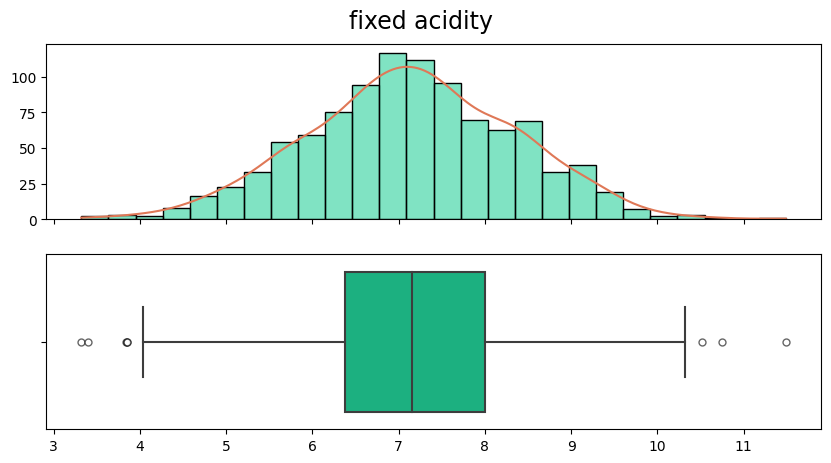

In [360]:
# Untuk kolom fixed acidity
hist_box_plot(anggur, anggur.columns[0])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan condong kiri (_negative skewed_) yang hampir tidak terlihat.
- Berdasarkan boxplot, terlihat bahwa data fix acidity memiliki rentang nilai yang cukup beragam.
- Nilai minimumnya hampir mendekati 4 dan maksimumnya melebihi 10 serta mediannya sedikit di atas 7
- Terdapat beberapa _outliers_ yang terlihat di bawah nilai minimum maupun di atas nilai maksimum.


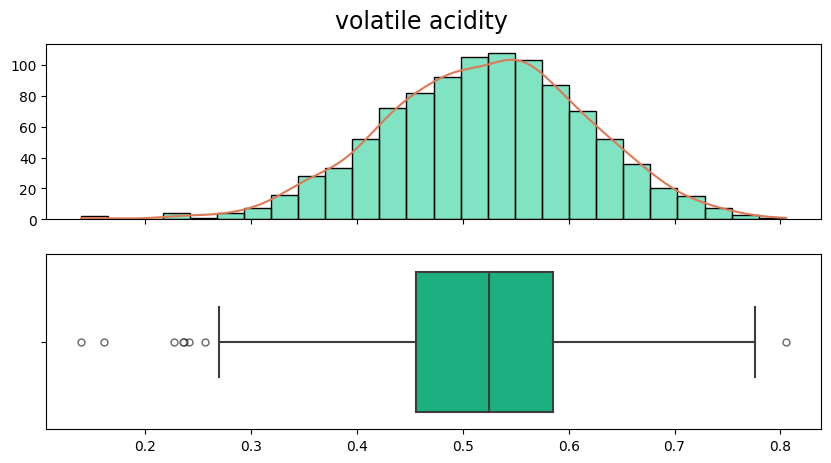

In [361]:
# Untuk kolom volatile acidity
hist_box_plot(anggur, anggur.columns[1])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _volatile acidity_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya kurang dari 0.3 dan maksimumnya kurang dari 0.8 serta mediannya sedikit di atas 0.5.
- Terdapat 1 _outliers_ yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum.


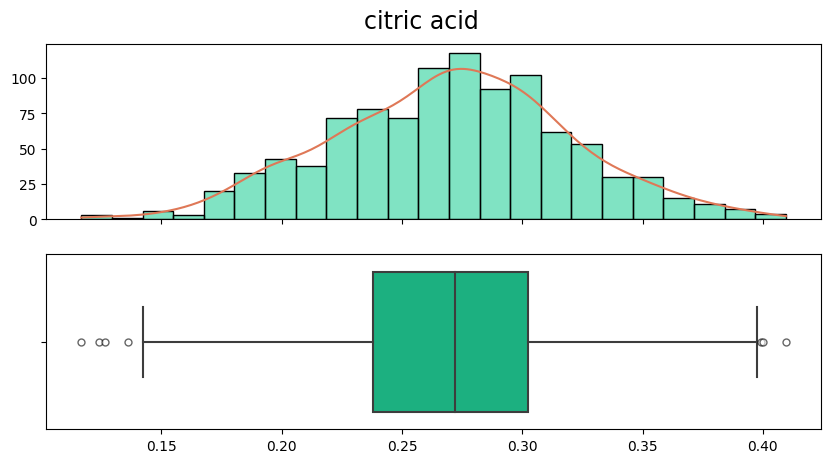

In [362]:
# Untuk kolom citric acid
hist_box_plot(anggur, anggur.columns[2])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kiri (_negative skewed_).
- Berdasarkan boxplot, terlihat bahwa data _citric acid_ memiliki rentang sangat kecil.
- Nilai minimumnya kurang dari 0.15 dan maksimumnya kurang dari 0.4 serta mediannya di antara 0.25 dan 0.30.
- Terdapat beberapa _outliers_ yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum.


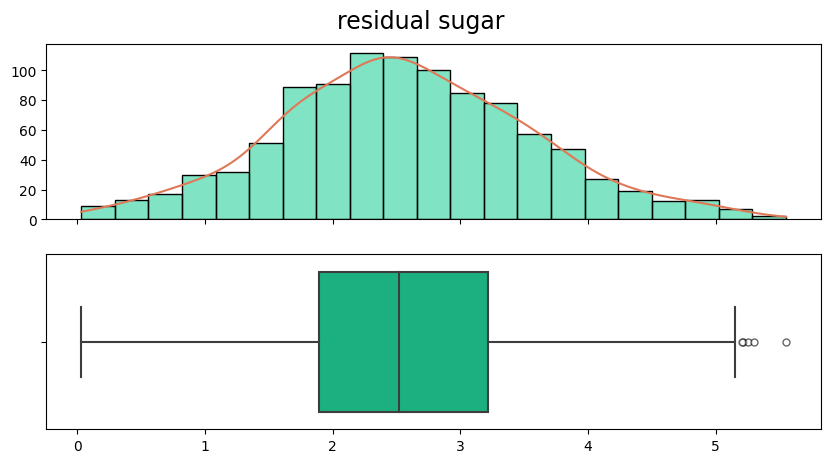

In [363]:
# Untuk kolom residual sugar
hist_box_plot(anggur, anggur.columns[3])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kiri (_negative skewed_).
- Berdasarkan boxplot, terlihat bahwa data _residual sugar_ memiliki rentang nilai yang cukup kecil.
- Nilai minimumnya 0 dan maksimumnya sedikit lebih dari 5 serta mediannya di antara 2 dan 3.
- _outliers_ tidak terlihat di bawah nilai minimumnya tapi terdapat beberapa di atas nilai maksimumnya.


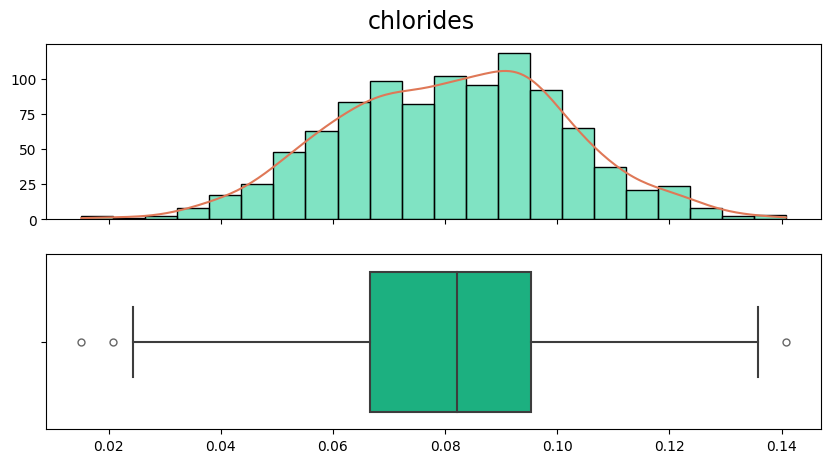

In [364]:
# Untuk kolom chlorides
hist_box_plot(anggur, anggur.columns[4])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _cholrides_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sedikit lebih dari 0.02 dan maksimumnya sedikit kurang dari 0.14 serta mediannya di sedikit di atas 0.08.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya.


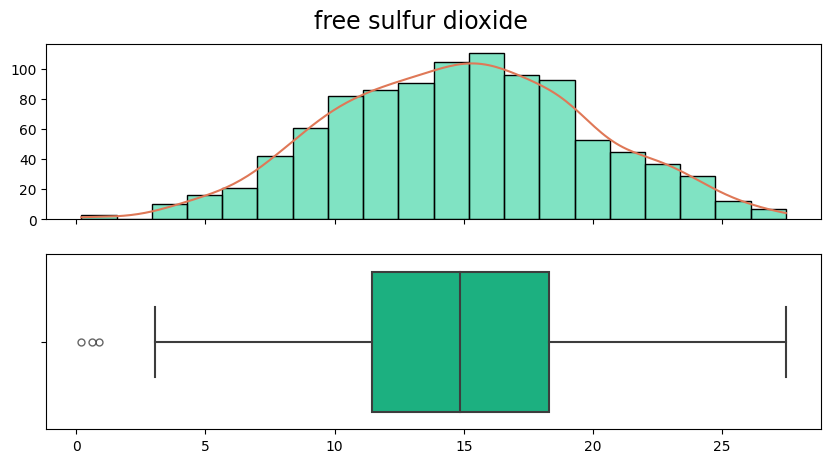

In [365]:
# Untuk kolom free sulfur dioxide
hist_box_plot(anggur, anggur.columns[5])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _free sulfur dioxied_ memiliki rentang nilai yangs kecil.
- Nilai minimumnya berada di antara 0 dan 5 serta maksimumnya lebih dari.25 serta mediannya sekitar 15.
- Tidak terdapat _outliers_ yang terlihat di bawah atas nilai maksimumnya tapi terlihat beberapa di bawah minimumnya.


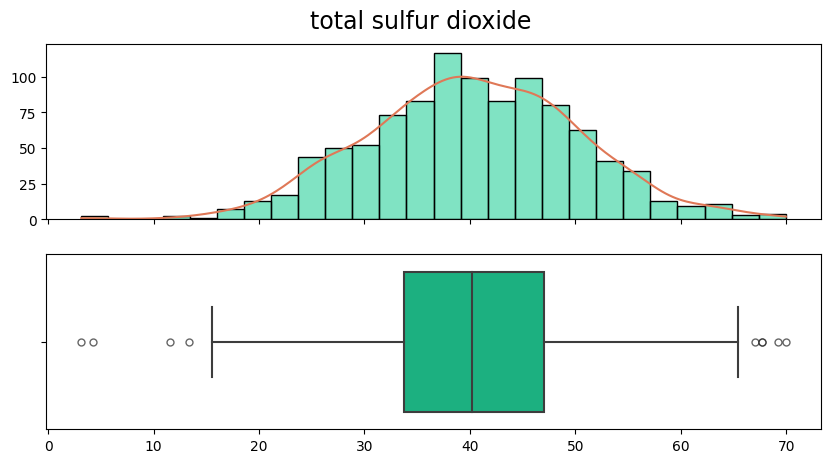

In [366]:
# Untuk kolom total sulfur dioxide
hist_box_plot(anggur, anggur.columns[6])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kiri (_negative skewed_) yang hampir tidak terlihat.
- Berdasarkan boxplot, terlihat bahwa data _total sulfur dioxied_ memiliki rentang nilai yang cukup besar.
- Nilai minimumnya sekitar 15 dan maksimumnya sekitar 65 serta mediannya sekitar 40.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya.


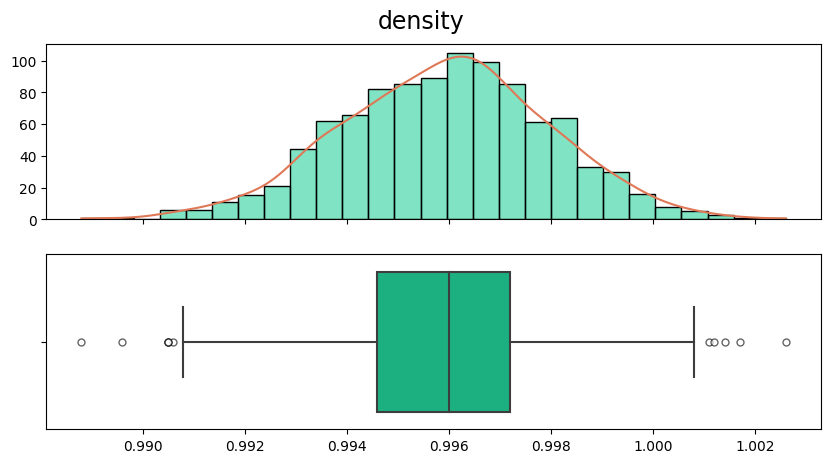

In [367]:
# Untuk kolom density
hist_box_plot(anggur, anggur.columns[7])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_) yang hampir tidak terlihat.
- Berdasarkan boxplot, terlihat bahwa data _density_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 0.991 dan maksimumnya sekitar 1,001 serta mediannya sekitar 0.996.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya.


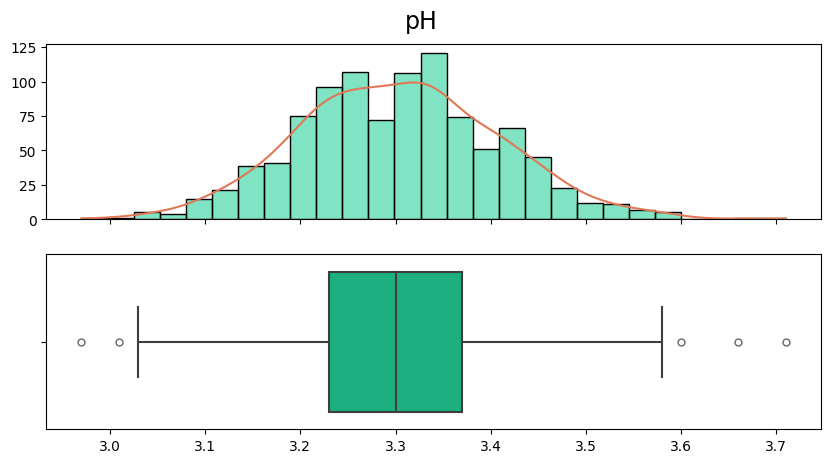

In [368]:
# Untuk kolom pH
hist_box_plot(anggur, anggur.columns[8])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kiri (_negative skewed_) yang hampir tidak terlihat.
- Berdasarkan boxplot, terlihat bahwa data _pH_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 3 dan maksimumnya sekitar 3.6 serta mediannya sekitar 3.3.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya.


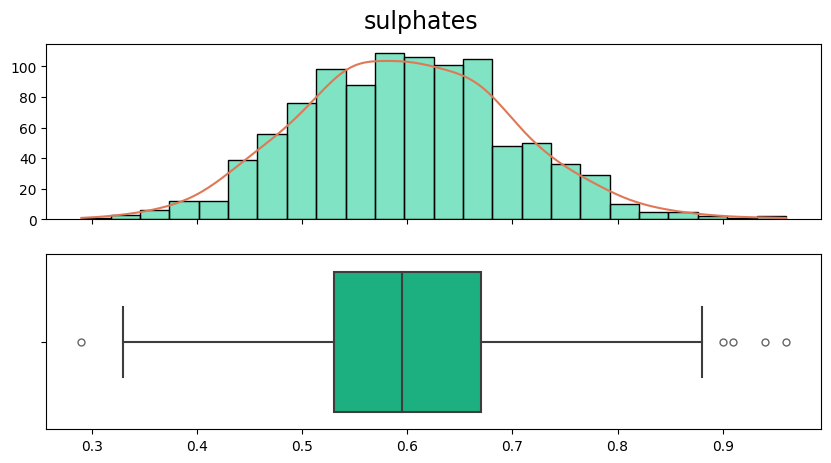

In [369]:
# Untuk kolom sulphates
hist_box_plot(anggur, anggur.columns[9])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _sulphates_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 0.3 dan maksimumnya sekitar 0.9 serta mediannya sekitar 0.6.
- Beberapa _outliers_ terlihat di atas nilai maksimumnya dan terdapat 1 outliers di bawah nilai minimumnya.


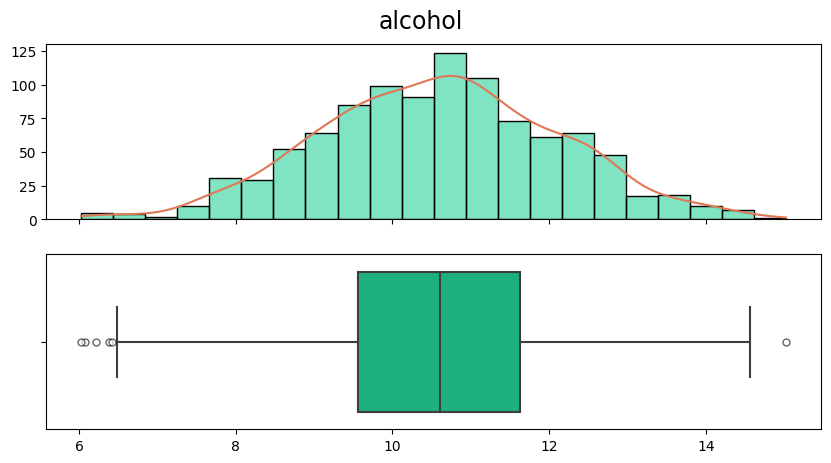

In [370]:
# Untuk kolom alcohol
hist_box_plot(anggur, anggur.columns[10])

- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _alcohol_ memiliki rentang nilai yang kecil.
- Nilai minimumnya sekitar 6 dan maksimumnya sekitar 14 serta mediannya sekitar 10.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan terdapat 1 outliers di atas nilai maksimumnya.


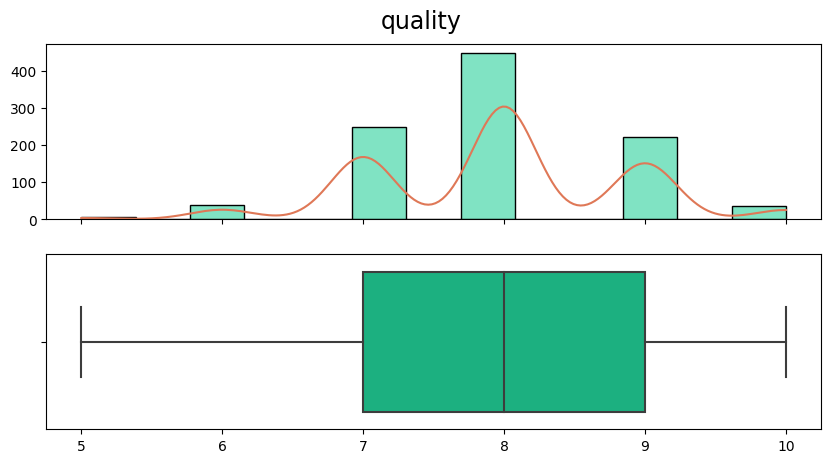

In [371]:
# Untuk kolom alcohol
hist_box_plot(anggur, anggur.columns[11])

- Berdasarkan histogram, terlihat bahwa data terdistribusi normal.
- Berdasarkan boxplot, terlihat bahwa data _quailty_ memiliki rentang nilai cukup kecil.
- Nilai minimumnya 5 dan maksimumnya sekitar 10 serta mediannya 8.
- Pada data ini pula tidak terdapat _outliers_.


### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.


Normality test yang digunakan dengan menggunakan fungsi dari library scipy. Implementasi yang digunakan pada scipy merupakan *__D'Agostino-Pearson Test__*

Dalam D'Agostino-Pearson Test, hipotesis null nya adalah bahwa sampel data berasal dari populasi dengan distribusi normal. Sedangkan hipotesis alternatifnya adalah bahwa sampel data tidak berasal dari distribusi normal.

Metode ini menghitung tiga statistik uji, yaitu skewness, kurtosis, dan normalitas. Skewness mengukur seberapa simetris distribusi data, sementara kurtosis mengukur seberapa tajam atau datar puncak distribusi. Normalitas mengukur seberapa dekat distribusi data dengan distribusi normal.

Hasil dari D'Agostino-Pearson Test adalah nilai p-value, yang menunjukkan seberapa signifikan perbedaan antara sampel data dengan distribusi normal. Jika nilai p-value lebih kecil dari alpha level yang ditentukan sebelumnya, maka hipotesis null ditolak dan dapat disimpulkan bahwa sampel data tidak berasal dari distribusi normal.


In [372]:
def normality(column):
    k2, p = st.normaltest(anggur[column])
    alpha = 0.05
    display(
        Markdown("Nilai *D'Agostino's K-squared Test*, p = {:g}".format(p)))
    if p < alpha:
        display(
            Markdown(f"Karena $p < {alpha}$ maka Hipotesis null ditolak, sehingga data kolom {column} tidak terdistribusi normal")
        )
    else:
        display(
            Markdown(f"Karena $p > {alpha}$, maka Hipotesis null tidak ditolak, sehingga data kolom {column} terdistribusi normal")
        )
        
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=True)
    g1 = sns.histplot(data=anggur, x=column, ax=ax1, color="#03c9c9",
                      kde=True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#c91703')
    g1.set(ylabel=None)
    g1.set(xlabel=None)
    fig.suptitle(f"Normality test {column}", y=1, fontsize=17)

Nilai *D'Agostino's K-squared Test*, p = 0.930858

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom fixed acidity terdistribusi normal

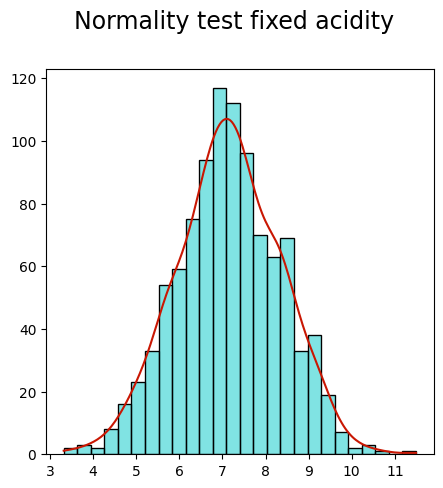

In [373]:
normality(anggur.columns[0])


Nilai *D'Agostino's K-squared Test*, p = 0.0225815

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom volatile acidity tidak terdistribusi normal

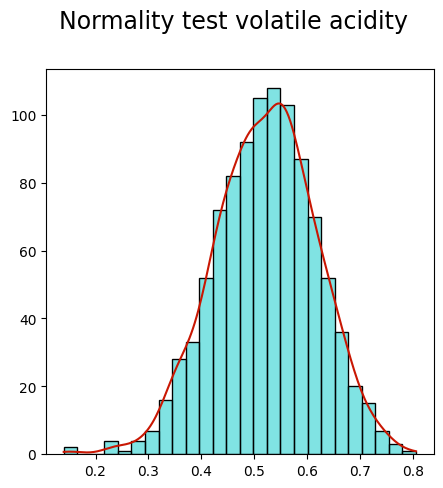

In [374]:
normality(anggur.columns[1])


Nilai *D'Agostino's K-squared Test*, p = 0.68169

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom citric acid terdistribusi normal

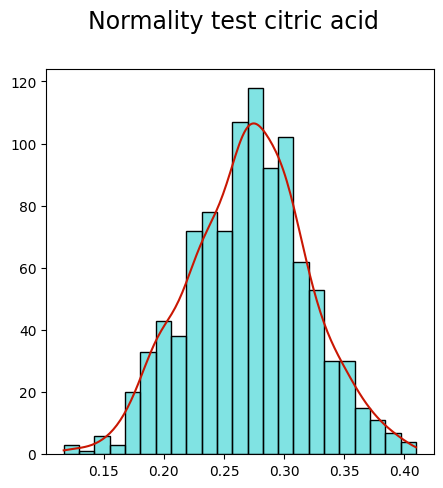

In [375]:
normality(anggur.columns[2])


Nilai *D'Agostino's K-squared Test*, p = 0.224667

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom residual sugar terdistribusi normal

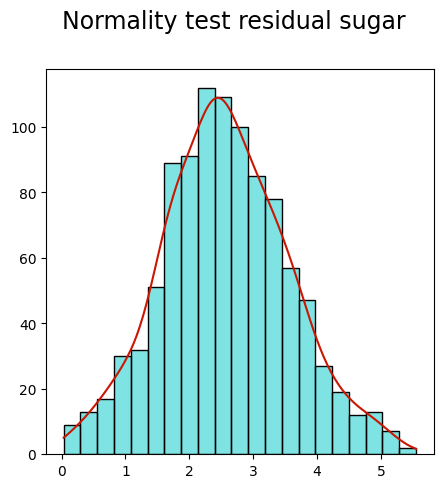

In [376]:
normality(anggur.columns[3])


Nilai *D'Agostino's K-squared Test*, p = 0.170483

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom chlorides terdistribusi normal

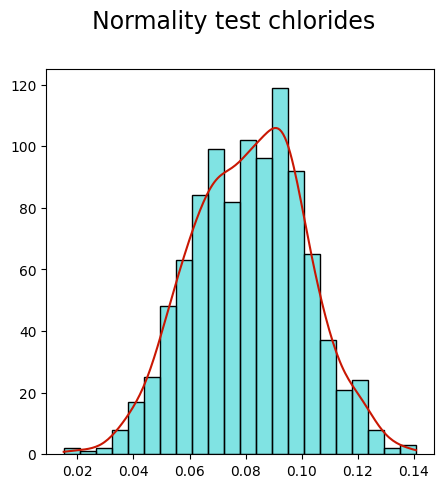

In [377]:
normality(anggur.columns[4])


Nilai *D'Agostino's K-squared Test*, p = 0.0174304

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom free sulfur dioxide tidak terdistribusi normal

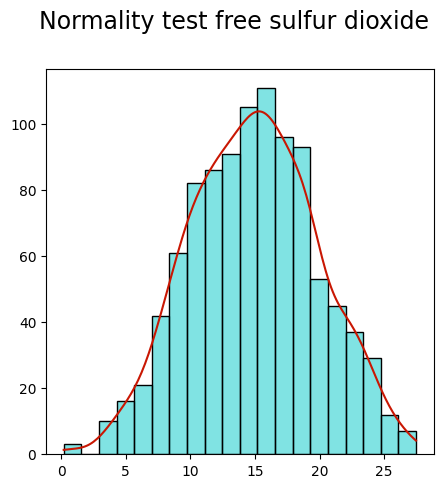

In [378]:
normality(anggur.columns[5])


Nilai *D'Agostino's K-squared Test*, p = 0.848885

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom total sulfur dioxide terdistribusi normal

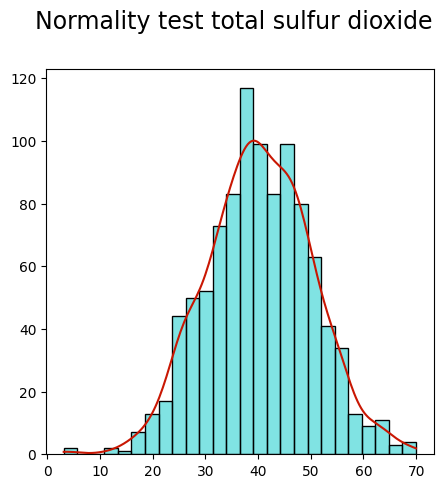

In [379]:
normality(anggur.columns[6])


Nilai *D'Agostino's K-squared Test*, p = 0.598523

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom density terdistribusi normal

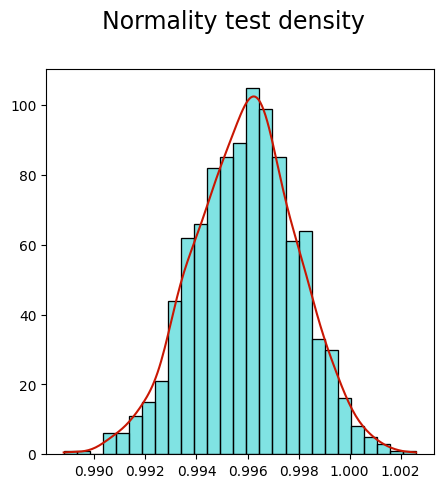

In [380]:
normality(anggur.columns[7])


Nilai *D'Agostino's K-squared Test*, p = 0.136787

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom pH terdistribusi normal

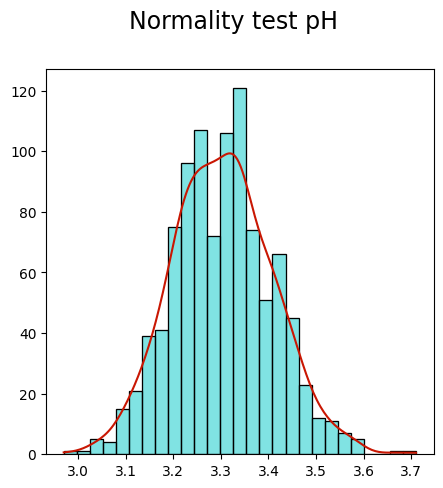

In [381]:
normality(anggur.columns[8])


Nilai *D'Agostino's K-squared Test*, p = 0.138843

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom sulphates terdistribusi normal

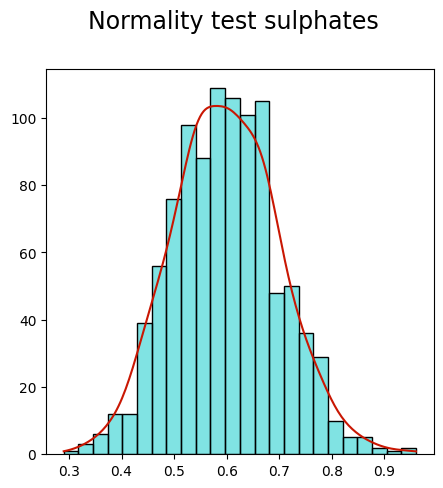

In [382]:
normality(anggur.columns[9])


Nilai *D'Agostino's K-squared Test*, p = 0.679088

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom alcohol terdistribusi normal

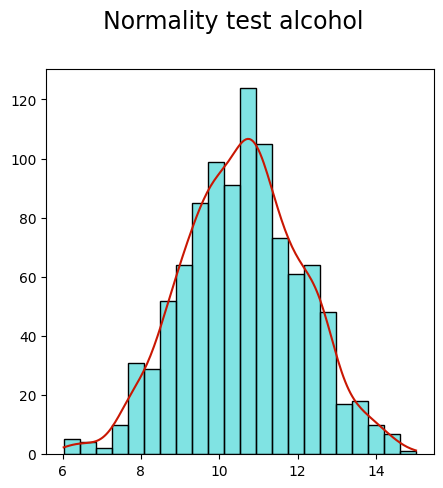

In [383]:
normality(anggur.columns[10])


Nilai *D'Agostino's K-squared Test*, p = 0.388814

Karena $p > 0.05$, maka Hipotesis null tidak ditolak, sehingga data kolom quality terdistribusi normal

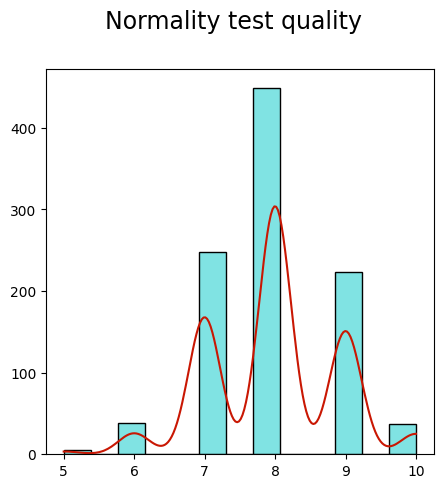

In [384]:
normality(anggur.columns[11])


### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.


#### Langkah Testing :

1. Tentukan Hipotesis nol ($H_0: \theta = \theta_0$), dimana $\theta$ bisa berupa $\theta$, $\theta$, $p$, atau data lain berdistribusi tertentu(Normal, binomial, dsc.)
2. Pilih hipotesis alternatif $H_1$ salah dari dari $\theta > \theta_0$ , $\theta < \theta_0$ , atau $\theta \neq \theta_0$
3. Tentukan tingkat signifikan $\alpha$
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung _p-value_ sesuai dengan uji statistik yang
   digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika _p-value_ lebih kecil dibanding tingkat signifikansi $\alpha$ yang diinginkan


In [385]:
def step_hypothesis_testing(theta0: float, alternative: str, alpha: float, proporsi : bool, desc0 : str, desc1 : str) -> None:
    # theta0       : null hypothesis.
    # alternative  : alternative hypothesis.
    # alpha        : The significance level.

    # (str, float) : tuple berisi decision dan p-value.

    sign = {"larger": ">", "smaller": "<", "two-sided": "\\neq"}

    if proporsi :
        display(Markdown(f"Dipilih $H_0$ : {desc0}   $(p_0 = {format(theta0)})$"))
        display(Markdown(f"Dipilih $H_1$ : {desc1}   $(p_0 {format(sign[alternative])} {format(theta0)})$"))
        display(Markdown(f"Tingkat signifikan $\\alpha={alpha}$"))
        display(Markdown("Dengan nilai Z: "))
        display(Markdown("<font size = '5'> $$Z = \\frac{\hat{p} - p_0}{\sqrt{\\frac{p_0(1-p_0)}{n}}}$$ </font>"))
    else:
        display(Markdown(f"Dipilih $H_0$ : {desc0} $(\mu = {format(theta0)})$"))
        display(Markdown(f"Dipilih $H_1$ : {desc1} $(\mu {format(sign[alternative])} {format(theta0)})$"))
        display(Markdown(f"Tingkat signifikan $\\alpha={alpha}$"))
        display(Markdown("Dengan nilai Z: "))
        display(Markdown("<font size = '5'> $$Z = \\frac{\\bar{x}-\mu_0}{\\sigma/\sqrt{n}}$$ <font size>"))

    
    if alternative == 'larger':
        # Jika alternative hypothesis lebih besar
        display(Markdown(
            "Uji Statistik yang digunakan adalah *Single Sample Right Tailed Z test*"))
        display(Markdown("Jika $z > z_a$, $H_0$ ditolak"))
        display(Markdown("Jika $z \\leq z_a$, $H_0$ tidak ditolak"))

    elif alternative == 'smaller':
        # Jika alternative hypothesis lebih kecil
        display(Markdown(
            "Uji Statistik yang digunakan adalah *Single Sample Left Tailed Z test*"))
        display(Markdown("Jika $z < z_a$, $H_0$ ditolak"))
        display(Markdown("Jika $z \\geq z_a$, $H_0$ tidak ditolak"))

    elif alternative == 'two-sided':
        # Jika alternative hypothesis 2 sisi
        display(Markdown(
            "Uji Statistik yang digunakan adalah *Single Sample Two Tailed Z test*"))
        display(Markdown(
            "Jika $z_{{\\alpha/2}}$ < $z$ < $z_{{\\alpha/2}}$, maka $H_0$ tidak ditolak"))
        display(Markdown("Selain itu, $H_0$ ditolak"))

    else:
        raise ValueError("Invalid alternative hypothesis.")
    display(Markdown("Jika $p < a$, keputusan $H_0$ ditolak semakin kuat"))
    display(Markdown("Jika $p \\geq a$, keputusan $H_0$ tidak ditolak semakin kuat"))

In [386]:
def hypothesis_testing(sample: pd.DataFrame, theta0: float, alternative: str, alpha: float, keterangan: str, proporsi : tuple) -> None:
    # sample       : dataframe yang memiliki 1 kolom.
    # theta0       : null hypothesis.
    # alternative  : alternative hypothesis.
    # alpha        : The significance level.

    # (str, float) : tuple berisi keputusan dan p-value.
    if proporsi[0]: 
        z, p_value = proportions_ztest(proporsi[1], proporsi[2], value = theta0, alternative = alternative, prop_var = theta0)
    else:
        z, p_value = ztest(sample, value=theta0, alternative=alternative)

    display(Markdown(f"Diperoleh $z={round(z,5)}$ dan $p={round(p_value,5)}$"))

    if alternative == 'larger':
        # Jika alternative hypothesis lebih besar

        crit_val = st.norm.ppf(1-alpha)
        display(Markdown(f"Diperoleh $z_\\alpha={round(crit_val,5)}$"))
        if z > crit_val:
            display(
                Markdown(f"Karena $z > {round(crit_val,5)}$, $H_0$ ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} tidak ditolak"))

        else:
            display(
                Markdown(f"Karena $z \\leq {round(crit_val,5)}$, $H_0$ tidak ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} ditolak"))

    elif alternative == 'smaller':
        # Jika alternative hypothesis lebih kecil

        crit_val = st.norm.ppf(alpha)
        display(Markdown(f"Diperoleh $z_\\alpha={round(crit_val,5)}$"))
        if z < crit_val:
            display(
                Markdown(f"Karena $z < {round(crit_val,5)}$, $H_0$ ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} tidak ditolak"))
        else:
            display(
                Markdown(f"Karena $z \\geq {round(crit_val,5)}$, $H_0$ tidak ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} ditolak"))

    elif alternative == 'two-sided':
        # Jika alternative hypothesis 2 sisi

        crit_val = st.norm.ppf(1 - alpha / 2)
        temp = "Diperoleh $z_{\\alpha/2}"+f"={round(crit_val,5)}$"
        display(Markdown(temp))
        if abs(z) > crit_val:
            display(
                Markdown(f"Karena $|z| > {round(crit_val,5)}$, maka $H_0$ ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} tidak ditolak"))
        else:
            display(
                Markdown(f"Karena $|z| \\leq {round(crit_val,5)}$, maka $H_0$ tidak ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} ditolak"))
    else:
        raise ValueError("Invalid alternative hypothesis.")

    if p_value < alpha:
        display(Markdown("Karena $p < a$, keputusan $H_0$ ditolak semakin kuat"))
    else:
        display(
            Markdown("Karena $p \\geq a$, keputusan $H_0$ tidak ditolak semakin kuat"))

In [387]:
# Make a function to show the histogram and box plots
def hist_blox(df: pd.DataFrame, keterangan: str) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 2.5))
    
    mean = df.mean()
    fig.text(.75, 0.9, f"Mean value: {mean:.3f}")
    
    g2 = sns.boxplot(x=df, color="#03C988", flierprops={"marker": 'o', "markersize": 5, "markeredgecolor": 'black', "markerfacecolor": 'white', "alpha": 0.6})

    g2.set(xlabel=None)
    g2.set(ylabel=None)
    g2.set_title(keterangan, fontsize=15)
    
    


#### a. Nilai rata-rata pH di atas 3.29?


In [388]:
step_hypothesis_testing(3.29, 'larger', 0.05, False, "Rata-rata pH sama dengan 3.29", "Rata-rata pH di atas 3.29")

Dipilih $H_0$ : Rata-rata pH sama dengan 3.29 $(\mu = 3.29)$

Dipilih $H_1$ : Rata-rata pH di atas 3.29 $(\mu > 3.29)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$ <font size>

Uji Statistik yang digunakan adalah *Single Sample Right Tailed Z test*

Jika $z > z_a$, $H_0$ ditolak

Jika $z \leq z_a$, $H_0$ tidak ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

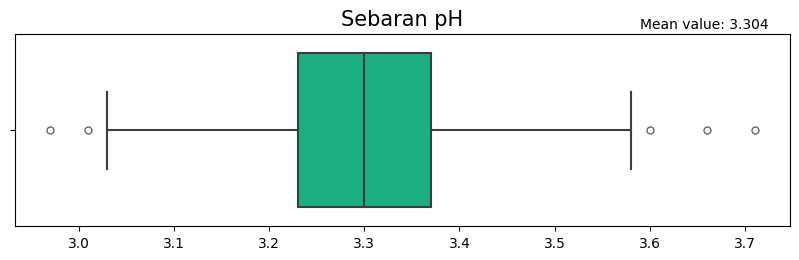

In [389]:
hist_blox(anggur['pH'], "Sebaran pH")

In [390]:
hypothesis_testing(anggur['pH'], 3.29, 'larger', 0.05, "pH rata-rata anggur lebih besar dari 3.29", (0,0))

Diperoleh $z=4.10378$ dan $p=2e-05$

Diperoleh $z_\alpha=1.64485$

Karena $z > 1.64485$, $H_0$ ditolak

Dengan demikian pernyataan pH rata-rata anggur lebih besar dari 3.29 tidak ditolak

Karena $p < a$, keputusan $H_0$ ditolak semakin kuat

#### b. Nilai rata-rata Residual Sugar tidak sama dengan 2.5?


In [391]:
step_hypothesis_testing(2.5, 'two-sided', 0.05, False, "Rata-rata Residual Sugar sama dengan 2.5", "Rata-rata Residual Sugar tidak sama dengan 2.5")

Dipilih $H_0$ : Rata-rata Residual Sugar sama dengan 2.5 $(\mu = 2.5)$

Dipilih $H_1$ : Rata-rata Residual Sugar tidak sama dengan 2.5 $(\mu \neq 2.5)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$ <font size>

Uji Statistik yang digunakan adalah *Single Sample Two Tailed Z test*

Jika $z_{{\alpha/2}}$ < $z$ < $z_{{\alpha/2}}$, maka $H_0$ tidak ditolak

Selain itu, $H_0$ ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

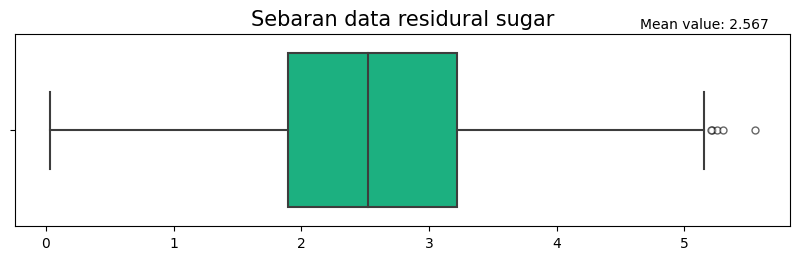

In [392]:
hist_blox(anggur['residual sugar'], "Sebaran data residural sugar")

In [393]:
hypothesis_testing(anggur['residual sugar'], 2.5, 'two-sided', 0.05, "rata-rata residual sugar tidak sama dengan 2.5", (False,False))

Diperoleh $z=2.14796$ dan $p=0.03172$

Diperoleh $z_{\alpha/2}=1.95996$

Karena $|z| > 1.95996$, maka $H_0$ ditolak

Dengan demikian pernyataan rata-rata residual sugar tidak sama dengan 2.5 tidak ditolak

Karena $p < a$, keputusan $H_0$ ditolak semakin kuat

#### c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?


In [394]:
step_hypothesis_testing(0.65, 'two-sided', 0.05, False, "Rata-rata 150 baris pertama Sulphates sama dengan 0.65", "Rata-rata 150 baris pertama Sulphates tidak sama dengan 0.65")

Dipilih $H_0$ : Rata-rata 150 baris pertama Sulphates sama dengan 0.65 $(\mu = 0.65)$

Dipilih $H_1$ : Rata-rata 150 baris pertama Sulphates tidak sama dengan 0.65 $(\mu \neq 0.65)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$ <font size>

Uji Statistik yang digunakan adalah *Single Sample Two Tailed Z test*

Jika $z_{{\alpha/2}}$ < $z$ < $z_{{\alpha/2}}$, maka $H_0$ tidak ditolak

Selain itu, $H_0$ ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

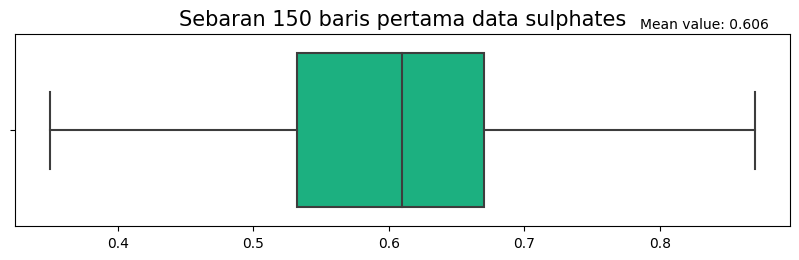

In [395]:
hist_blox(anggur.head(150)['sulphates'], "Sebaran 150 baris pertama data sulphates")

In [396]:
hypothesis_testing(anggur['sulphates'].head(150), 0.65, 'two-sided', 0.05, "rata-rata 150 baris pertama kolom sulphates bukan 0.65", (False,False))

Diperoleh $z=-4.96484$ dan $p=0.0$

Diperoleh $z_{\alpha/2}=1.95996$

Karena $|z| > 1.95996$, maka $H_0$ ditolak

Dengan demikian pernyataan rata-rata 150 baris pertama kolom sulphates bukan 0.65 tidak ditolak

Karena $p < a$, keputusan $H_0$ ditolak semakin kuat

#### d. Nilai rata-rata total sulfur dioxide di bawah 35?

In [397]:
step_hypothesis_testing(35, 'smaller', 0.05, False, "Rata-rata Total Sulfur Dioxide tidak di bawah 35", "Rata-rata Total Sulfur Dioxide di bawah 35")

Dipilih $H_0$ : Rata-rata Total Sulfur Dioxide tidak di bawah 35 $(\mu = 35)$

Dipilih $H_1$ : Rata-rata Total Sulfur Dioxide di bawah 35 $(\mu < 35)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$ <font size>

Uji Statistik yang digunakan adalah *Single Sample Left Tailed Z test*

Jika $z < z_a$, $H_0$ ditolak

Jika $z \geq z_a$, $H_0$ tidak ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

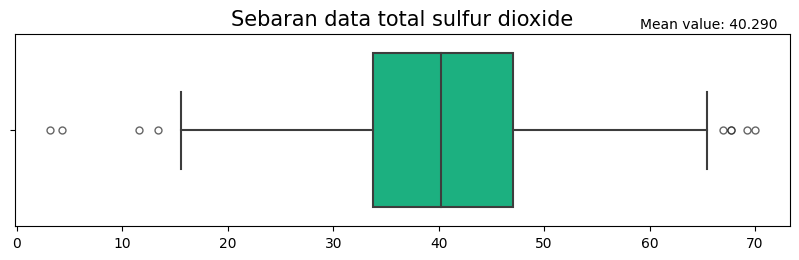

In [398]:
hist_blox(anggur['total sulfur dioxide'], "Sebaran data total sulfur dioxide")

In [399]:
hypothesis_testing(anggur['total sulfur dioxide'], 35, 'smaller', 0.05, "rata-rata total sulfur dioxide di bawah 35", (False,False))

Diperoleh $z=16.78639$ dan $p=1.0$

Diperoleh $z_\alpha=-1.64485$

Karena $z \geq -1.64485$, $H_0$ tidak ditolak

Dengan demikian pernyataan rata-rata total sulfur dioxide di bawah 35 ditolak

Karena $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

#### e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%?

In [400]:
step_hypothesis_testing(0.5, 'two-sided', 0.05, True, "Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah sama dengan 50%", "Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%")

Dipilih $H_0$ : Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah sama dengan 50%   $(p_0 = 0.5)$

Dipilih $H_1$ : Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%   $(p_0 \neq 0.5)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$ </font>

Uji Statistik yang digunakan adalah *Single Sample Two Tailed Z test*

Jika $z_{{\alpha/2}}$ < $z$ < $z_{{\alpha/2}}$, maka $H_0$ tidak ditolak

Selain itu, $H_0$ ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

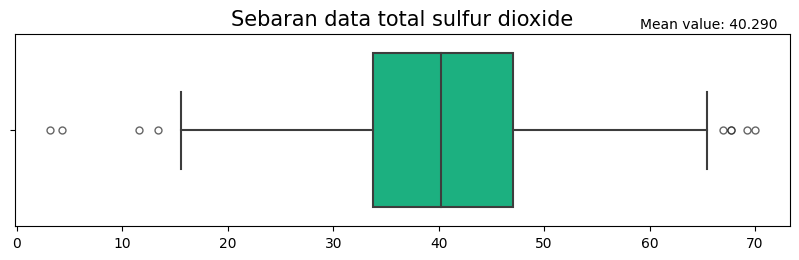

In [401]:
hist_blox(anggur['total sulfur dioxide'], "Sebaran data total sulfur dioxide")

In [402]:
proporsi = (True, len(anggur[anggur['total sulfur dioxide'] > 40]['total sulfur dioxide']), len(anggur['total sulfur dioxide']))
hypothesis_testing(anggur['total sulfur dioxide'], 0.5, "two-sided", 0.05, "Persentase nilai Total Sulfur Dioxide yang lebih dari 40 tidak sama dengan 50%", proporsi)

Diperoleh $z=0.75895$ dan $p=0.44788$

Diperoleh $z_{\alpha/2}=1.95996$

Karena $|z| \leq 1.95996$, maka $H_0$ tidak ditolak

Dengan demikian pernyataan Persentase nilai Total Sulfur Dioxide yang lebih dari 40 tidak sama dengan 50% ditolak

Karena $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

### 5 Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [403]:
def step_hypothesis2_testing(theta0: float, alternative: str, alpha: float, jenis : str, desc0 : str, desc1 : str) -> None:
    # theta0       : null hypothesis.
    # alternative  : alternative hypothesis.
    # alpha        : The significance level.

    # (str, float) : tuple berisi decision dan p-value.

    sign = {"larger": ">", "smaller": "<", "two-sided": "\\neq"}

    if jenis=="proporsi": 
        display(Markdown(f"Dipilih $H_0$ : {desc0}   $(p_1 - p_2= {format(theta0)})$"))
        display(Markdown(f"Dipilih $H_1$ : {desc1}   $(p_1 - p_2 {format(sign[alternative])} {format(theta0)})$"))
        display(Markdown(f"Tingkat signifikan $\\alpha={alpha}$"))
        display(Markdown("Dengan nilai Z: "))
        display(Markdown("<font size = '5'> $$Z = \\frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p} \hat{q} \left(\\frac{1}{n_1} + \\frac{1}{n_2}\\right)}}$$ </font>"))
    elif jenis=="normal":
        display(Markdown(f"Dipilih $H_0$ : {desc0} $(\mu_1-\mu_2 = {format(theta0)})$"))
        display(Markdown(f"Dipilih $H_1$ : {desc1} $(\mu-\mu_2 {format(sign[alternative])} {format(theta0)})$"))
        display(Markdown(f"Tingkat signifikan $\\alpha={alpha}$"))
        display(Markdown("Dengan nilai Z: "))
        display(Markdown("<font size = '5'> $$Z = \\frac{(\\bar{x_1}-\\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{{\\sigma_1}^2/n_1+{\\sigma_2}^2/n_2}}$$ <font size>"))
    elif jenis=="variansi" :
        display(Markdown(f"Dipilih $H_0$ : {desc0} "+"${({\\sigma_1}^2={\\sigma_2}^2)}$"))
        display(Markdown(f"Dipilih $H_1$ : {desc1} "+"${({\\sigma_1}^2\\neq{\\sigma_2}^2)}$"))
        display(Markdown(f"Tingkat signifikan $\\alpha={alpha}$"))
        display(Markdown("Dengan nilai $f$: "))
        display(Markdown("<font size = '5'> $$f = \\frac{{s_1}^2}{{s_2}^2}$$ <font size>"))

    
    if alternative == 'larger':
        # Jika alternative hypothesis lebih besar
        display(Markdown(
            "Uji Statistik yang digunakan adalah *Two Sample Right Tailed Z test*"))
        display(Markdown("Jika $z > z_a$, $H_0$ ditolak"))
        display(Markdown("Jika $z \\leq z_a$, $H_0$ tidak ditolak"))

    elif alternative == 'smaller':
        # Jika alternative hypothesis lebih kecil
        display(Markdown(
            "Uji Statistik yang digunakan adalah *Two Sample Left Tailed Z test*"))
        display(Markdown("Jika $z < z_a$, $H_0$ ditolak"))
        display(Markdown("Jika $z \\geq z_a$, $H_0$ tidak ditolak"))

    elif alternative == 'two-sided':
        # Jika alternative hypothesis 2 sisi
        display(Markdown(
            "Uji Statistik yang digunakan adalah *Two Sample Two Tailed Z test*"))
        display(Markdown(
            "Jika $z_{{\\alpha/2}}$ < $z$ < $z_{{\\alpha/2}}$, maka $H_0$ tidak ditolak"))
        display(Markdown("Selain itu, $H_0$ ditolak"))
    
    elif alternative == "variansi" :
        display(Markdown(
            "Uji Statistik yang digunakan adalah *Two Sample Two Tailed F test* "))
        display(Markdown(
            "Jika $f<f_{1-\\alpha/2}(v_1,v_2)$ atau $f>f_{\\alpha/2} (v_1,v_2)$, maka $H_0$ ditolak"))
        display(Markdown("Selain itu, $H_0$ tidak ditolak"))
        

    else:
        raise ValueError("Invalid alternative hypothesis.")
    display(Markdown("Jika $p < a$, keputusan $H_0$ ditolak semakin kuat"))
    display(Markdown("Jika $p \\geq a$, keputusan $H_0$ tidak ditolak semakin kuat"))
# step_hypothesis2_testing(0.5, 'two-sided', 0.05, "normal", "Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah sama dengan 50%", "Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%")

In [404]:
def hypothesis_testing2(sample1: pd.DataFrame,sample2:pd.DataFrame, theta0: float, alternative: str, alpha: float, keterangan: str, proporsi : tuple) -> None:
    # sample       : dataframe yang memiliki 1 kolom.
    # theta0       : null hypothesis.
    # alternative  : alternative hypothesis.
    # alpha        : The significance level.
    # keterangan   : Desctiption of the hypothesis testing
    # proporsi     : If it's proportion hypothesis testing

    if proporsi[0]: 
        z, p_value = proportions_ztest(proporsi[1], proporsi[2], value = theta0, alternative = alternative)
        display(Markdown(f"Diperoleh $z={round(z,5)}$ dan $p={round(p_value,5)}$"))
    elif(alternative != "variansi"):
        z, p_value = ztest(sample1,sample2, value=theta0, alternative=alternative)
        display(Markdown(f"Diperoleh $z={round(z,5)}$ dan $p={round(p_value,5)}$"))

    

    if alternative == 'larger':
        # Jika alternative hypothesis lebih besar

        crit_val = st.norm.ppf(1-alpha)
        display(Markdown(f"Diperoleh $z_\\alpha={round(crit_val,5)}$"))
        if z > crit_val:
            display(
                Markdown(f"Karena $z > {round(crit_val,5)}$, $H_0$ ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} tidak ditolak"))

        else:
            display(
                Markdown(f"Karena $z \\leq {round(crit_val,5)}$, $H_0$ tidak ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} ditolak"))

    elif alternative == 'smaller':
        # Jika alternative hypothesis lebih kecil

        crit_val = st.norm.ppf(alpha)
        display(Markdown(f"Diperoleh $z_\\alpha={round(crit_val,5)}$"))
        if z < crit_val:
            display(
                Markdown(f"Karena $z < {round(crit_val,5)}$, $H_0$ ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} tidak ditolak"))
        else:
            display(
                Markdown(f"Karena $z \\geq {round(crit_val,5)}$, $H_0$ tidak ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} ditolak"))

    elif alternative == 'two-sided':
        # Jika alternative hypothesis 2 sisi

        crit_val = st.norm.ppf(1 - alpha / 2)
        temp = "Diperoleh $z_{\\alpha/2}"+f"={round(crit_val,5)}$"
        display(Markdown(temp))
        if abs(z) > crit_val:
            display(
                Markdown(f"Karena $|z| > {round(crit_val,5)}$, maka $H_0$ ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} ditolak"))
        else:
            display(
                Markdown(f"Karena $|z| \\leq {round(crit_val,5)}$, maka $H_0$ tidak ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} tidak ditolak"))
    elif alternative == "variansi" :
        f= sample1.var()/sample2.var()
        p_value=1-st.f.cdf(f,len(sample1)-1,len(sample2)-1)
        display(Markdown(f"Diperoleh $f={round(f,5)}$ dan $p={round(p_value,5)}$"))

        f_low=st.f.ppf(alpha/2,len(sample1)-1,len(sample2)-1)
        f_high=st.f.ppf(1-alpha/2,len(sample1)-1,len(sample2)-1)
        display(Markdown(f"Diperoleh $f_{{\\alpha/2}}={round(f_low,5)}$ dan $f_{{1-\\alpha/2}}={round(f_high,5)}$"))
        
        if(f<f_low or f>f_high):
            display(
                Markdown(f"Karena $f < {round(f_low,5)}$ atau $f > {round(f_high,5)}$, maka $H_0$ ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} ditolak"))
        else:
            display(
                Markdown(f"Karena ${round(f_low,5)} \\leq f \\leq {round(f_high,5)}$, maka $H_0$ tidak ditolak"))
            display(
                Markdown(f"Dengan demikian pernyataan {keterangan} tidak ditolak"))
    else:
        raise ValueError("Invalid alternative hypothesis.")

    if p_value < alpha:
        display(Markdown("Karena $p < a$, keputusan $H_0$ ditolak semakin kuat"))
    else:
        display(
            Markdown("Karena $p \\geq a$, keputusan $H_0$ tidak ditolak semakin kuat"))

In [405]:
# Make a function to show the histogram and box plots
def hist_blox2(df1: pd.DataFrame,df2:pd.DataFrame, keterangan1: str,keterangan2: str) -> None:
    fig, (ax1, ax2) = plt.subplots(
        nrows=2, ncols=1, figsize=(10, 5), sharex=True)
    g1 = sns.boxplot(x=df1,ax=ax1, color="#03C988", flierprops={"marker": 'o', "markersize": 5, "markeredgecolor": 'black', "markerfacecolor": 'white', "alpha": 0.6})
    g2 = sns.boxplot(x=df2,ax=ax2, color="#03C988", flierprops={"marker": 'o', "markersize": 5, "markeredgecolor": 'black', "markerfacecolor": 'white', "alpha": 0.6})
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    g2.set(xlabel=None)
    g2.set(ylabel=None)
    g1.set_title(keterangan1)
    g2.set_title(keterangan2)


#### a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

In [406]:
step_hypothesis2_testing(0, 'two-sided', 0.05, "normal", "Rata-rata data kolom fixed acidity bagian awal dan bagian akhir sama","Rata-rata data kolom fixed acidity awal dan akhir tidak sama")

Dipilih $H_0$ : Rata-rata data kolom fixed acidity bagian awal dan bagian akhir sama $(\mu_1-\mu_2 = 0)$

Dipilih $H_1$ : Rata-rata data kolom fixed acidity awal dan akhir tidak sama $(\mu-\mu_2 \neq 0)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{{\sigma_1}^2/n_1+{\sigma_2}^2/n_2}}$$ <font size>

Uji Statistik yang digunakan adalah *Two Sample Two Tailed Z test*

Jika $z_{{\alpha/2}}$ < $z$ < $z_{{\alpha/2}}$, maka $H_0$ tidak ditolak

Selain itu, $H_0$ ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

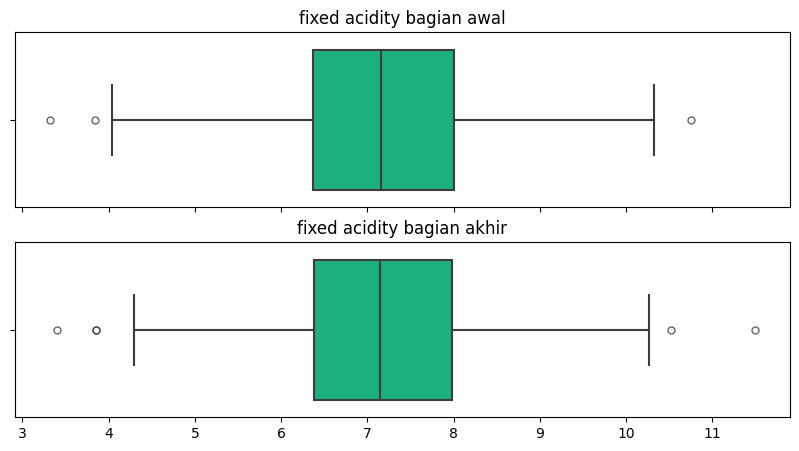

In [407]:
hist_blox2(anggur['fixed acidity'][:len(anggur)//2], anggur['fixed acidity'][len(anggur)//2:], 
           "fixed acidity bagian awal", "fixed acidity bagian akhir")

In [408]:
hypothesis_testing2(anggur['fixed acidity'][:len(anggur)//2], anggur['fixed acidity'][len(anggur)//2:], 0, 'two-sided', 0.05, "Rata-rata data kolom fixed acidity awal dan akhir sama", (False, False))

Diperoleh $z=0.02604$ dan $p=0.97922$

Diperoleh $z_{\alpha/2}=1.95996$

Karena $|z| \leq 1.95996$, maka $H_0$ tidak ditolak

Dengan demikian pernyataan Rata-rata data kolom fixed acidity awal dan akhir sama tidak ditolak

Karena $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

#### b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

In [409]:
step_hypothesis2_testing(0.001,'two-sided',0.05,'normal',"Rata-rata bagian awal kolom chlorides lebih besar dari rata-rata bagian akhir kolom chlorides sebesar 0.001","Rata-rata bagian awal kolom chlorides tidak lebih besar dari rata-rata bagian akhir kolom chlorides sebesar 0.001")

Dipilih $H_0$ : Rata-rata bagian awal kolom chlorides lebih besar dari rata-rata bagian akhir kolom chlorides sebesar 0.001 $(\mu_1-\mu_2 = 0.001)$

Dipilih $H_1$ : Rata-rata bagian awal kolom chlorides tidak lebih besar dari rata-rata bagian akhir kolom chlorides sebesar 0.001 $(\mu-\mu_2 \neq 0.001)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{{\sigma_1}^2/n_1+{\sigma_2}^2/n_2}}$$ <font size>

Uji Statistik yang digunakan adalah *Two Sample Two Tailed Z test*

Jika $z_{{\alpha/2}}$ < $z$ < $z_{{\alpha/2}}$, maka $H_0$ tidak ditolak

Selain itu, $H_0$ ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

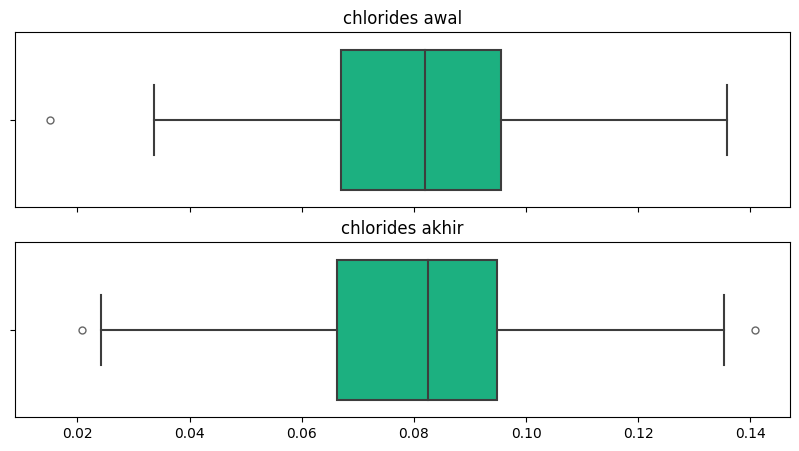

In [410]:
hist_blox2(anggur['chlorides'][:len(anggur)//2],anggur['chlorides'][len(anggur)//2:],"chlorides awal","chlorides akhir")

In [411]:
hypothesis_testing2(anggur['chlorides'][:len(anggur)//2],anggur['chlorides'][len(anggur)//2:], 0.001, 'two-sided', 0.05,"Rata-rata bagian awal kolom chlorides lebih besar dari rata-rata bagian akhir kolom chlorides sebesar 0.001", (False,False))

Diperoleh $z=-0.46732$ dan $p=0.64027$

Diperoleh $z_{\alpha/2}=1.95996$

Karena $|z| \leq 1.95996$, maka $H_0$ tidak ditolak

Dengan demikian pernyataan Rata-rata bagian awal kolom chlorides lebih besar dari rata-rata bagian akhir kolom chlorides sebesar 0.001 tidak ditolak

Karena $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

#### c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

In [412]:
step_hypothesis2_testing(0, 'two-sided', 0.05, "normal", "Rata rata 25 baris pertama kolom Volatile Acidity sama dengan rata rata 25 baris pertama kolom Sulphates","Rata rata 25 baris pertama kolom Volatile Acidity tidak sama dengan rata rata 25 baris pertama kolom Sulphates")

Dipilih $H_0$ : Rata rata 25 baris pertama kolom Volatile Acidity sama dengan rata rata 25 baris pertama kolom Sulphates $(\mu_1-\mu_2 = 0)$

Dipilih $H_1$ : Rata rata 25 baris pertama kolom Volatile Acidity tidak sama dengan rata rata 25 baris pertama kolom Sulphates $(\mu-\mu_2 \neq 0)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{{\sigma_1}^2/n_1+{\sigma_2}^2/n_2}}$$ <font size>

Uji Statistik yang digunakan adalah *Two Sample Two Tailed Z test*

Jika $z_{{\alpha/2}}$ < $z$ < $z_{{\alpha/2}}$, maka $H_0$ tidak ditolak

Selain itu, $H_0$ ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

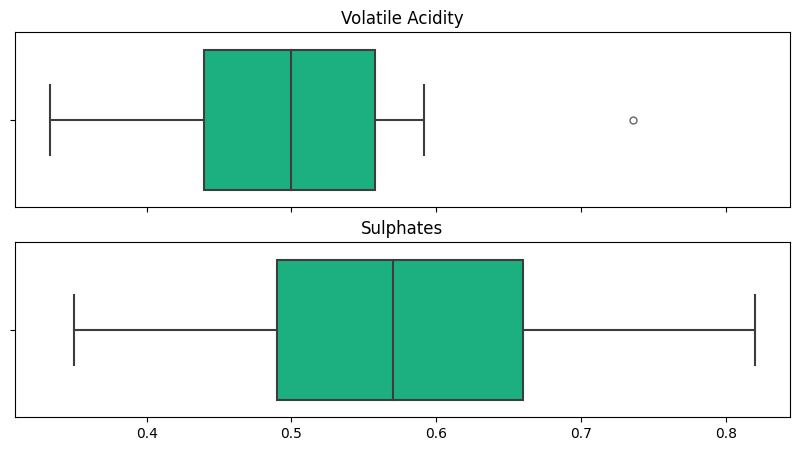

In [413]:
hist_blox2(anggur['volatile acidity'][:25],anggur['sulphates'][:25],"Volatile Acidity","Sulphates")

In [414]:
hypothesis_testing2(anggur['volatile acidity'][:25],anggur['sulphates'][:25], 0, 'two-sided', 0.05,"Rata rata 25 baris pertama kolom Volatile Acidity sama dengan rata rata 25 baris pertama kolom Sulphates", (False,False))

Diperoleh $z=-2.63748$ dan $p=0.00835$

Diperoleh $z_{\alpha/2}=1.95996$

Karena $|z| > 1.95996$, maka $H_0$ ditolak

Dengan demikian pernyataan Rata rata 25 baris pertama kolom Volatile Acidity sama dengan rata rata 25 baris pertama kolom Sulphates ditolak

Karena $p < a$, keputusan $H_0$ ditolak semakin kuat

#### d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

In [415]:
step_hypothesis2_testing(0,'variansi',0.05,'variansi',"Variansi kolom residual awal sugar memiliki variansi yang sama dengan variansi kolom residual akhir sugar","Variansi kolom residual awal sugar memiliki variansi yang tidak sama dengan variansi kolom residual akhir sugar")

Dipilih $H_0$ : Variansi kolom residual awal sugar memiliki variansi yang sama dengan variansi kolom residual akhir sugar ${({\sigma_1}^2={\sigma_2}^2)}$

Dipilih $H_1$ : Variansi kolom residual awal sugar memiliki variansi yang tidak sama dengan variansi kolom residual akhir sugar ${({\sigma_1}^2\neq{\sigma_2}^2)}$

Tingkat signifikan $\alpha=0.05$

Dengan nilai $f$: 

<font size = '5'> $$f = \frac{{s_1}^2}{{s_2}^2}$$ <font size>

Uji Statistik yang digunakan adalah *Two Sample Two Tailed F test* 

Jika $f<f_{1-\alpha/2}(v_1,v_2)$ atau $f>f_{\alpha/2} (v_1,v_2)$, maka $H_0$ ditolak

Selain itu, $H_0$ tidak ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

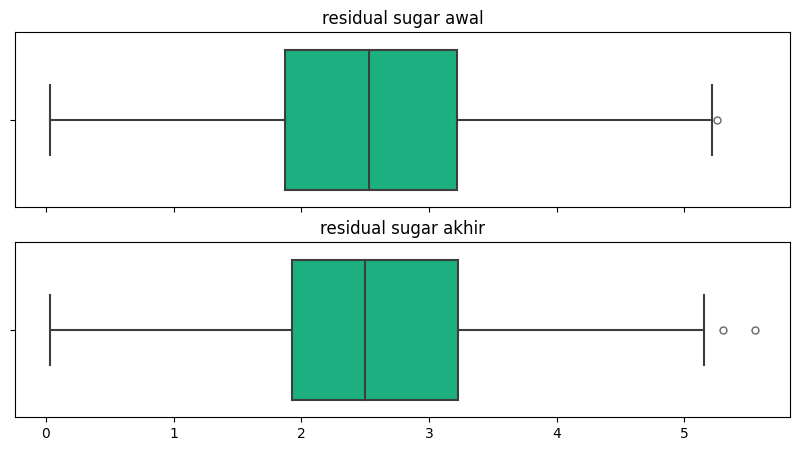

In [416]:
hist_blox2(anggur['residual sugar'][:len(anggur)//2],anggur['residual sugar'][len(anggur)//2:],"residual sugar awal","residual sugar akhir")

In [417]:
hypothesis_testing2(anggur['residual sugar'][:len(anggur)//2],anggur['residual sugar'][len(anggur)//2:], 0, 'variansi', 0.05,"Variansi kolom residual awal sugar memiliki variansi yang sama dengan variansi kolom residual akhir sugar", (False,False))

Diperoleh $f=0.942$ dan $p=0.74759$

Diperoleh $f_{\alpha/2}=0.83889$ dan $f_{1-\alpha/2}=1.19206$

Karena $0.83889 \leq f \leq 1.19206$, maka $H_0$ tidak ditolak

Dengan demikian pernyataan Variansi kolom residual awal sugar memiliki variansi yang sama dengan variansi kolom residual akhir sugar ditolak

Karena $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

#### e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

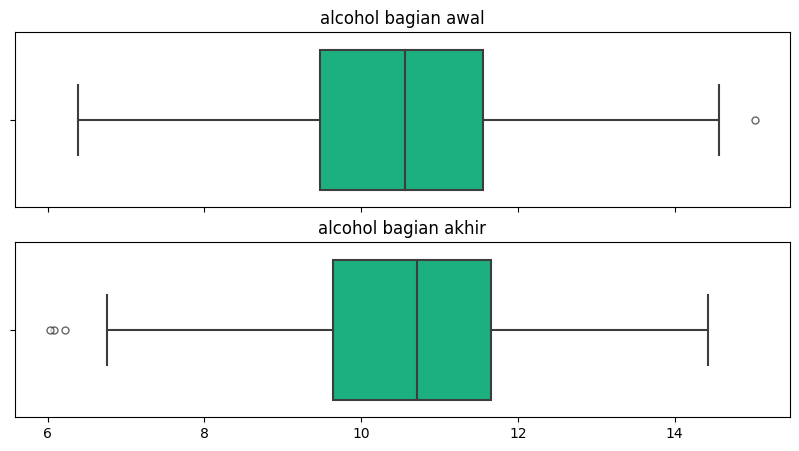

In [418]:
hist_blox2(anggur['alcohol'][:len(anggur)//2], anggur['alcohol'][len(anggur)//2:],"alcohol bagian awal","alcohol bagian akhir")

In [419]:
step_hypothesis2_testing(0, 'larger', 0.05, 'proporsi', 'Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah tidak lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol', 'Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol')

Dipilih $H_0$ : Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah tidak lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol   $(p_1 - p_2= 0)$

Dipilih $H_1$ : Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol   $(p_1 - p_2 > 0)$

Tingkat signifikan $\alpha=0.05$

Dengan nilai Z: 

<font size = '5'> $$Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p} \hat{q} \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$$ </font>

Uji Statistik yang digunakan adalah *Two Sample Right Tailed Z test*

Jika $z > z_a$, $H_0$ ditolak

Jika $z \leq z_a$, $H_0$ tidak ditolak

Jika $p < a$, keputusan $H_0$ ditolak semakin kuat

Jika $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat

In [420]:
proporsi = (True, [len(anggur[:len(anggur)//2][anggur['alcohol'] > 7].alcohol), len(anggur[len(anggur)//2:][anggur['alcohol'] > 7].alcohol)], 
       [len(anggur[:len(anggur)//2].alcohol), len(anggur[len(anggur)//2:].alcohol)])

hypothesis_testing2(anggur[:len(anggur)//2][anggur['alcohol'] > 7].alcohol, anggur[len(anggur)//2:][anggur['alcohol'] > 7].alcohol, 0, 'larger', 0.05, "proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol", proporsi)

C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Diperoleh $z=0.0$ dan $p=0.5$

Diperoleh $z_\alpha=1.64485$

Karena $z \leq 1.64485$, $H_0$ tidak ditolak

Dengan demikian pernyataan proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol ditolak

Karena $p \geq a$, keputusan $H_0$ tidak ditolak semakin kuat